<a href="https://colab.research.google.com/github/chocojini/saessag_project2/blob/main/%5B230405%5DLending_Club_loan_Defaulter_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import

In [2]:
!pip install --upgrade pandas
%pip install pandas==0.25.3
!pip uninstall pandas

!pip install pandas

  Using cached pandas-0.25.3.tar.gz (12.6 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Found existing installation: pandas 2.1.2
Uninstalling pandas-2.1.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pandas-2.1.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pandas/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-2.1.2
  Using cached pandas-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [3]:
!pip install klib
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import klib
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
pd.set_option('display.max_columns', None)

from tqdm import tqdm
import time

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, auc, roc_curve, precision_score, recall_score, f1_score , accuracy_score



# data 불러오기

In [7]:
ori_df = pd.read_csv('/content/lending_club_loan_two.csv')
ori_df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [ ]:
df = ori_df.copy()
print(df[df.isnull().any(axis=1)])

# EDA

In [9]:
df = ori_df.copy()
# term
df['term'] = df['term'].apply(lambda x: 0 if x == ' 36 months' else 1)

# grade
def grade_to_num(grade):
    grade_dict = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
    return grade_dict[grade]

df['grade_num'] = df['grade'].apply(lambda x: grade_to_num(x))
# emp_length
mode_values = df.groupby(['home_ownership', 'annual_inc'])['emp_length'].transform(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'unknown')
df['emp_length'].fillna(mode_values, inplace=True)
def convert_emp_length(emp_length):
    if isinstance(emp_length, str):
        emp_length = emp_length.replace(' years', '').replace(' year', '')
        if '+' in emp_length:
            emp_length = emp_length.replace('+', '')
            return int(emp_length)
        elif '<' in emp_length:
            return 0
        elif 'unknown' in emp_length:
            return -1
        else:
            return int(emp_length)
    else:
        return emp_length

df['emp_length'] = df['emp_length'].apply(convert_emp_length)
# home_ownership 'OTHER', 'ANY' 를 'OTHER_ANY'로 통합
df['home_ownership'] = df['home_ownership'].replace(['OTHER', 'ANY'], 'OTHER_ANY')
# 인코딩 전에 mort_acc 값을 처리하기위해 먼저 진행 'home_ownership', 'total_acc' 을 그룹지어 mort_acc의 평균을 mort_acc의 nan와 대체, 대체값 역시 nan인 경우 -1 입력
df['mort_acc'] = df['mort_acc'].fillna(df.groupby(['home_ownership', 'total_acc'])['mort_acc'].transform(
    lambda x: x.mean() if not x.isna().any() else (np.nan if x.isnull().all() else x.dropna().mean())))
df['mort_acc'] = df['mort_acc'].round()
# home_ownership  인코딩
df = pd.get_dummies(df, columns=['home_ownership'])
# verification_status
df = pd.concat([df, pd.get_dummies(df['verification_status'], prefix='verification_status')], axis=1)
df.drop('verification_status', axis=1, inplace=True)
# issue_d 열을 date time 형식으로 변환
df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)
max_date = df['issue_d'].max() # max값 계산
df['loan_period'] = max_date - df['issue_d'] # 기간 계산
df['loan_period'] = (df['loan_period'].dt.total_seconds().astype(int))/86400
# loan_status
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
# purpose
df = pd.get_dummies(df, columns=['purpose'])
# earliest_cr_line
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],infer_datetime_format=True)  # earliest_cr_line 칼럼의 값을 datetime 형식으로 변환
latest_cr_line = df['earliest_cr_line'].max() # earliest_cr_line에서 가장 최근 대출 발생일 계산
df['earliest_cr_line_cat'] = pd.cut((latest_cr_line - df['earliest_cr_line']).dt.days,   # 최근 대출 발생일을 기준으로 earliest_cr_line 칼럼을 날짜 차이(day)로 계산하고 카테고리화
                                    bins=[-1, 365*2, 365*5, 365*10, 365*20, 365*30, np.inf],
                                    labels=[0, 1, 2, 3, 4, 5])
# revol_util
df.loc[df['revol_bal'] == 0, 'revol_util'] = 0
# initial_list_status
df['initial_list_status'] = df['initial_list_status'].apply(lambda x: 0 if x == 'w' else 1)

df.dropna(subset=['mort_acc', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

df = df.drop(['grade', 'issue_d', 'sub_grade', 'emp_title', 'title', 'earliest_cr_line', 'application_type', 'address'], axis=1)

<ipython-input-9-97891e6a482f>:42: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)
<ipython-input-9-97891e6a482f>:42: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'], infer_datetime_format=True)
<ipython-input-9-97891e6a482f>:51: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['earliest_cr_line'] = pd.to_

In [10]:
# target = 'mort_acc'
# corr = df.corr()[[target]].abs().sort_values(target, ascending=False)
# sns.set(font_scale=1.2)
# plt.subplots(figsize=(10,20))
# sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .5})
# plt.title('Correlation with {}'.format(target), fontsize=16)
# plt.tight_layout()
# plt.savefig('mort_acc_corr')

In [11]:
# # sns.clustermap(df_corr,
# #                annot = False,      # 실제 값 화면에 나타내기
# #                cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
# #                vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
# #               )

# cor = df.corr()

# f, ax = plt.subplots(figsize=(12, 12))
# cmap = sns.diverging_palette(200, 10, as_cmap=True)

# mask = np.zeros_like(cor, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# sns.heatmap(cor, mask=mask, cmap=cmap, center=0.5, square=True,
#             linewidths=0.5, cbar_kws={"shrink": 0.75}, annot=False)

# scaler

In [12]:
from sklearn.model_selection import train_test_split
X_data = df[df.columns.difference(['loan_status'])]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y,
                                                    stratify=y,
                                                    random_state = 42,
                                                    test_size = 0.2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [14]:
from sklearn.metrics import classification_report
base_ABC = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
base_ABC.fit(X_train, y_train)

# ▶ 예측
base_ABC_y_pred_train = base_ABC.predict(X_train)
base_ABC_y_pred_test = base_ABC.predict(X_test)

print(classification_report(y_train, base_ABC_y_pred_train))
print(classification_report(y_test, base_ABC_y_pred_test))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

              precision    recall  f1-score   support

           0       0.57      0.09      0.15     62060
           1       0.82      0.98      0.89    254274

    accuracy                           0.81    316334
   macro avg       0.69      0.53      0.52    316334
weighted avg       0.77      0.81      0.75    316334

              precision    recall  f1-score   support

           0       0.55      0.09      0.15     15515
           1       0.81      0.98      0.89     63569

    accuracy                           0.81     79084
   macro avg       0.68      0.53      0.52     79084
weighted avg       0.76      0.81      0.75     79084



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

#해당 fit으로 test데이터도 transform 해줍니다
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

## scaled

In [17]:
scal_ABC = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
scal_ABC.fit(X_scaled, y_train)

# ▶ 예측
scal_ABC_y_pred_train = scal_ABC.predict(X_scaled)
scal_ABC_y_pred_test = scal_ABC.predict(X_test_scaled)

print(classification_report(y_train, scal_ABC_y_pred_train))
print(classification_report(y_test, scal_ABC_y_pred_test))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

              precision    recall  f1-score   support

           0       0.57      0.09      0.15     62060
           1       0.82      0.98      0.89    254274

    accuracy                           0.81    316334
   macro avg       0.69      0.53      0.52    316334
weighted avg       0.77      0.81      0.75    316334

              precision    recall  f1-score   support

           0       0.55      0.09      0.15     15515
           1       0.81      0.98      0.89     63569

    accuracy                           0.81     79084
   macro avg       0.68      0.53      0.52     79084
weighted avg       0.76      0.81      0.75     79084



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

## undersampler

In [18]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_under, y_under = undersample.fit_resample(X_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

## SMOTE

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

# 선정 된 데이터

In [20]:
from sklearn.metrics import classification_report
# {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
dt = DecisionTreeClassifier(splitter='best', min_samples_split=2, min_samples_leaf=4,
max_features='log2', max_depth=5, criterion='gini', random_state=42)
dt.fit(X_under, y_under)

# ▶ 예측
dt_y_pred_train = dt.predict(X_under)
dt_y_pred_test = dt.predict(X_test_scaled)

print(classification_report(y_under, dt_y_pred_train))
print(classification_report(y_test, dt_y_pred_test))

# {'n_estimators': 100, 'learning_rate': 1}
ABC = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
ABC.fit(X_under, y_under)

# ▶ 예측
ABC_y_pred_train = ABC.predict(X_under)
ABC_y_pred_test = ABC.predict(X_test_scaled)

print(classification_report(y_under, ABC_y_pred_train))
print(classification_report(y_test, ABC_y_pred_test))

# {'weights': 'uniform', 'n_neighbors': 11}
knn = KNeighborsClassifier(weights='uniform', n_neighbors=11)
knn.fit(X_under, y_under)

# ▶ 예측
knn_y_pred_train = knn.predict(X_under)
knn_y_pred_test = knn.predict(X_test_scaled)

print(classification_report(y_under, knn_y_pred_train))
print(classification_report(y_test, knn_y_pred_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

              precision    recall  f1-score   support

           0       0.63      0.70      0.66     62060
           1       0.66      0.59      0.62     62060

    accuracy                           0.65    124120
   macro avg       0.65      0.65      0.64    124120
weighted avg       0.65      0.65      0.64    124120



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

              precision    recall  f1-score   support

           0       0.29      0.70      0.41     15515
           1       0.89      0.59      0.71     63569

    accuracy                           0.61     79084
   macro avg       0.59      0.64      0.56     79084
weighted avg       0.77      0.61      0.65     79084



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

              precision    recall  f1-score   support

           0       0.66      0.68      0.67     62060
           1       0.67      0.65      0.66     62060

    accuracy                           0.67    124120
   macro avg       0.67      0.67      0.67    124120
weighted avg       0.67      0.67      0.67    124120



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

              precision    recall  f1-score   support

           0       0.32      0.68      0.43     15515
           1       0.89      0.64      0.75     63569

    accuracy                           0.65     79084
   macro avg       0.60      0.66      0.59     79084
weighted avg       0.78      0.65      0.69     79084



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     62060
           1       0.70      0.69      0.70     62060

    accuracy                           0.70    124120
   macro avg       0.70      0.70      0.70    124120
weighted avg       0.70      0.70      0.70    124120

              precision    recall  f1-score   support

           0       0.28      0.62      0.39     15515
           1       0.87      0.62      0.72     63569

    accuracy                           0.62     79084
   macro avg       0.58      0.62      0.56     79084
weighted avg       0.75      0.62      0.66     79084



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


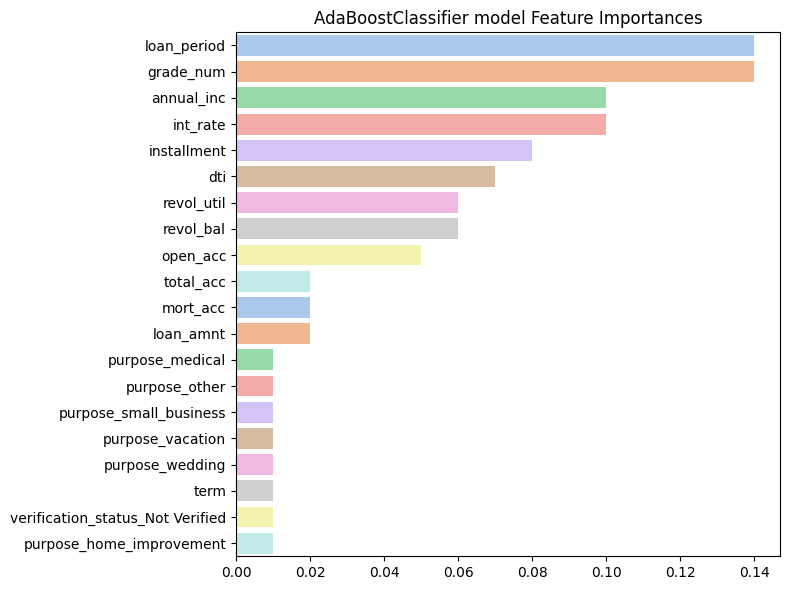

In [21]:
ftr_importances_values = ABC.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('AdaBoostClassifier model Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index, palette="pastel")
plt.rc('xtick', labelsize=5)
plt.tight_layout()
plt.savefig('importance')

In [22]:
# {'penalty': 'l2', 'C': 0.1}
lr = LogisticRegression(penalty='l2', C=0.1)
lr.fit(X_under, y_under)

# ▶ 예측
lr_y_pred_train = lr.predict(X_under)
lr_y_pred_test = lr.predict(X_test_scaled)

print(classification_report(y_under, lr_y_pred_train))
print(classification_report(y_test, lr_y_pred_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

              precision    recall  f1-score   support

           0       0.66      0.64      0.65     62060
           1       0.65      0.67      0.66     62060

    accuracy                           0.65    124120
   macro avg       0.65      0.65      0.65    124120
weighted avg       0.65      0.65      0.65    124120

              precision    recall  f1-score   support

           0       0.32      0.63      0.42     15515
           1       0.88      0.67      0.76     63569

    accuracy                           0.66     79084
   macro avg       0.60      0.65      0.59     79084
weighted avg       0.77      0.66      0.69     79084



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp